<a href="https://colab.research.google.com/github/EddyGiusepe/Scatter_plot/blob/main/Plot_scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>**Scatter plot: Um Guia Completo para Gráficos de Dispersão**</h2> 

\\
**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro


Os links de estudos:

* https://www.flai.com.br/juscudilio/scatter-plot-um-guia-completo-para-graficos-de-dispersao/

* https://github.com/scudilio/Visualizacao_de_dados

Os gráficos de dispersão ou Scatter plot são representações gráficas do relacionamento entre duas variáveis numéricas. O Scatter plot utiliza pontos para representar essa relação, cada ponto representa o valor de uma variável no eixo horizontal e o valor de outra variável no eixo vertical.

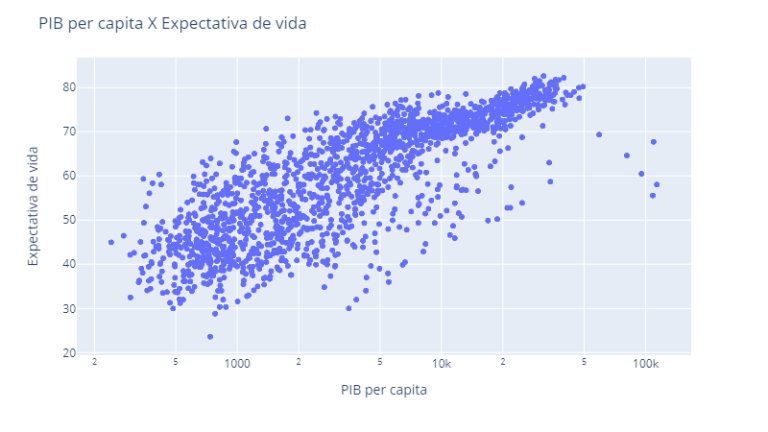

No gráfico acima, temos o gráfico de dispersão do logaritmo do PIB (Produto Interno Bruto) per capita pela Expectativa de Vida. Cada ponto do gráfico apresenta o valor do logaritmo do PIB per capita de um país em relação a Expectativa de Vida do país.

Observa-se, que quanto maior o PIB per capita, maior a expectativa de vida. Ou seja, existe uma correlação positiva entre essas variáveis (a medida que uma variável aumenta a outra variável também aumenta).

## Quando você deve usar um gráfico de dispersão?

Descrito por Francis Galton, o Scatter plot é usado para verificar se existe uma relação entre causa e efeito entre duas variáveis numéricas.

Isso não significa que uma variável causa efeito na outra, mas apenas se existe uma relação e qual intensidade entre essa relação. A relação entre duas variáveis pode ser positiva, negativa ou neutra, linear ou não linear.

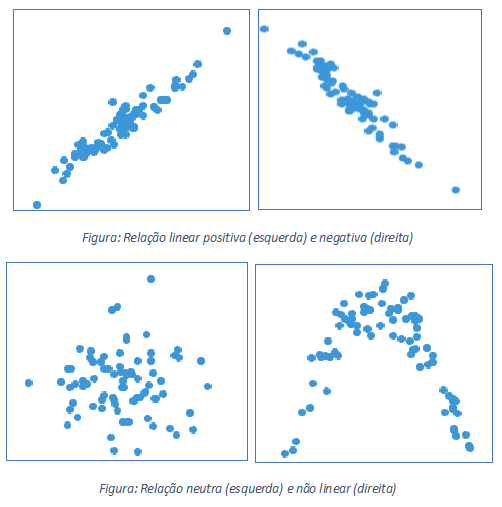

O gráfico de dispersão não mostra apenas o valor individualmente, mas mostra os dados como um todo. Sendo útil para identificar outro padrões nos dados, como outlier (pontos extremos) ou possíveis grupos entre os dados.

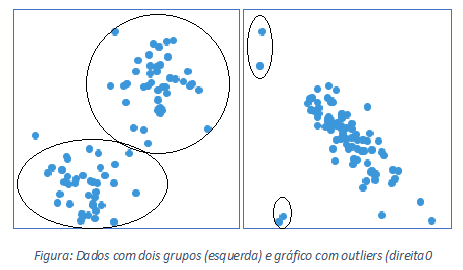

## Exemplo de estrutura de dados

Para criar gráficos de dispersão precisamos de um conjunto de dados, que tenha no mínimo duas variáveis numéricas (variáveis quantitativas). Aqui vamos utilizar o dataset ‘gapminder’.

Esse conjunto de dados ficou muito famoso após a apresentação do Hans Rosling, um doutor e estatístico sueco que apresentava e ilustrava os dados através de uma história atraente (storytelling).

Os dados gapminder resume informações da população, PIB e expectativa de vida dos países ao longo do tempo.


\\
O conjunto de dados está disponível em https://github.com/scudilio/Visualizacao_de_dados


## Importando dados de uma planilha Excel

O data set está numa planilha do Excel, para importar o arquivo utilizamos a função ‘read_excel’

In [6]:
# Bibliotecas a usar

import pandas as pd
import plotly.express as px



In [5]:
# Importando o dataset
# Ler como importar Dataset desde o GitHub --> https://github.com/scudilio/Visualizacao_de_dados/blob/master/Import_Dataset_Colab.ipynb

url= ('https://github.com/EddyGiusepe/Scatter_plot/blob/main/gapminder_final.xlsx?raw=true')
df= pd.read_excel(url)
df.head()

,country,year,gdpPercap,lifeExp,pop,continent
0,Afghanistan,1920,1490,30.6,10600000,Asia
1,Afghanistan,1921,1520,30.7,10500000,Asia
2,Afghanistan,1922,1550,30.8,10300000,Asia
3,Afghanistan,1923,1570,30.8,9710000,Asia
4,Afghanistan,1924,1600,30.9,9200000,Asia


In [8]:
len(df)

15655

## Como construir um Scatter plot

O gráfico de dispersão mais comum é o bivariado, onde temos duas variáveis contínuas e buscamos entender a relação entre elas. Aqui utilizaremos a variável expectativa de vida e o logaritmo do PIB per capita.

Utilizamos a escala logarítmica, pois os dados do PIB per capita possui muito valores com alta variabilidade e o logaritmo reduz a escala dos dados facilitando a visualização dos dados.

Para construir o Scatter plot utilizaremos a biblioteca ‘plotly.express’. ‘Plotly’ é uma biblioteca de visualização de dados em Python, com ela é possível construir gráficos interativos de maneira simples e que são esteticamente bonitos.

Para construir o Scatter plot utilizamos a função ‘scatter’ e com apenas uma linha de código geramos o gráfico. As funções ‘upddate’ é para configurar a aparência, o título e eixos do gráfico.

In [7]:

fig  = px.scatter(df, x = 'gdpPercap', y = 'lifeExp', log_x = True, width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Logaritmo do PIB per capita X Expectativa de vida')
fig.update_xaxes(title = 'Log(PIB per capita)')
fig.update_yaxes(title = 'Expectativa de vida')
fig.show()

Observe que quanto maior o PIB per capita de um país maior é a expectativa de vida. Vale ressaltar, que nesse primeiro gráfico plotamos todos os anos juntos, causando uma poluição visual.

Sendo esse um dos problemas dos gráficos de dispersão, muitos pontos em um gráfico só. Detalhamos esse problema a seguir

## Principais problemas ao utilizar gráficos de dispersão

**1. Overplotting**

Quando temos muitos dados a serem plotados, os pontos podem se sobrepor a um grau que fica difícil ver a relações entre as variáveis.

Existem algumas maneiras de resolver esse problema, uma das alternativas é plotar apenas uma subconjunto dos dados. Uma amostra aleatória deve fornecer a idéia geral dos padrões dos dados.

Para aplicar essa técnica de amostragem utilizaremos a função ‘sample’, para selecionar 1000 observações aleatória do data set.

In [9]:
df_sample = df.sample(n=1000)
fig = px.scatter(df_sample, x = 'gdpPercap', y = 'lifeExp', log_x = True, width = 800)
fig.update_traces(marker = dict(size=12, line = dict(width=2)),selector=dict(mode = 'markers'))
fig.update_layout(title = 'Logaritmo do PIB per capita X Expectativa de vida')
fig.update_xaxes(title ='Log (PIB per capita)')
fig.update_yaxes(title = 'Expectativa de vida')
fig.show()

Observe que mesmo considerando apenas uma amostra do conjunto de dados, mantemos a ideia geral dos dados. Quanto maior o PIB per capita, maior a expectativa de vida. A segunda alternativa para resolver o overplotting, é colocar transparência nos pontos, permitindo que as sobreposições sejam visíveis. Para isso utilizamos a opção ‘opacity’

In [13]:
fig=px.scatter(df_sample, x = 'gdpPercap', opacity=0.6, y = 'lifeExp', log_x = True, width = 800)
fig.update_layout(title = 'Logaritmo PIB per capita X Expectativa de vida')
fig.update_xaxes(title = 'Log (PIB per capita)')
fig.update_yaxes(title = 'Expectativa de vida')
fig.show()